In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__ #pandas version

'0.17.1'

# Establish Connection to DB through SSH

In [3]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

# Run the desired query 

In [4]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 604800
offset = 3445388
location = 'Torschlag_Trafo' + '%'
list_data = []
#Uncomment and run the below query to read all the data of particular location
#while True:
#    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
#    print(q)
#    list_data.append(query(q))
#    offset += chunk_size
#    if len(list_data[-1]) < chunk_size:
#        break
#print("Query executed")
# print("Concatenating....")
# dfs = pd.concat(list_data)

#To read only specific rows of data
q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s OFFSET %s" % (location,chunk_size,offset))
print(q)
list_data.append(query(q))
dfs = pd.concat(list_data)



now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-23 17:05:16.357299
SELECT * FROM energy_sample_data1 where location like 'Torschlag_Trafo%' ORDER BY Serial_no LIMIT 604800 OFFSET 3445388
End date and time using str method of datetime object:
2016-12-23 17:10:22.071000
Execution Completed


In [5]:
dfs.shape

(604800, 16)

In [6]:
dfs.head()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,67730411,2016-01-20,00:00:00,237.06,236.96,236.71,6.99,14.88,14.09,11.29,8191.65,8514.99,0.92,22495,23879280.64,Torschlag_Trafo_20012016.csv
1,67730412,2016-01-20,00:00:01,237.06,236.96,236.71,6.99,14.88,14.09,11.29,8191.65,8514.99,0.92,22495,23879280.64,Torschlag_Trafo_20012016.csv
2,67730413,2016-01-20,00:00:02,237.06,236.96,236.71,6.99,14.88,14.09,11.29,8191.65,8514.99,0.92,22495,23879280.64,Torschlag_Trafo_20012016.csv
3,67730414,2016-01-20,00:00:03,237.20,237.16,236.71,7.04,14.89,14.09,11.10,8191.65,8514.99,0.92,22495,23879280.64,Torschlag_Trafo_20012016.csv
4,67730415,2016-01-20,00:00:04,237.20,237.16,236.96,7.04,14.89,14.04,11.10,8220.56,8525.51,0.92,22495,23879290.88,Torschlag_Trafo_20012016.csv


In [7]:
dfs.tail()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
604795,68603226,2016-01-23,23:59:55,231.56,230.78,230.8,7.26,27.01,10.50,17.36,10098.92,10328.94,0.84,22495,26318983.68,Torschlag_Trafo_23012016.csv
604796,68603227,2016-01-23,23:59:56,231.56,230.78,230.8,7.26,27.01,10.50,17.36,10098.92,10328.94,0.84,22495,26318983.68,Torschlag_Trafo_23012016.csv
604797,68603228,2016-01-23,23:59:57,231.56,230.78,230.8,7.26,27.01,10.50,17.36,10098.92,10328.94,0.84,22495,26318983.68,Torschlag_Trafo_23012016.csv
604798,68603229,2016-01-23,23:59:58,231.56,230.78,230.8,7.26,27.01,10.50,17.36,10098.92,10328.94,0.84,22495,26318983.68,Torschlag_Trafo_23012016.csv
604799,68603230,2016-01-23,23:59:59,231.49,231.18,231.2,7.31,27.36,10.46,17.85,10179.09,10431.47,0.84,22495,26318983.68,Torschlag_Trafo_23012016.csv


# Read the saved CSV


In [ ]:
dfs = pd.read_csv('Torschlag_df.csv',sep=',')

In [ ]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

In [ ]:
columns_list = dfs.columns

# Run the below code when data is read from SQL

In [8]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [9]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [10]:
#df_cols = cols_sql.iloc[:,0] # use this to read columns from sql
#columns_names= df_cols.tolist()

print("Columns names:")
print(dfs.columns.tolist())

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [11]:
import gc
gc.collect()
#dfs.iloc[0:2500000][1:].corr()
#dfs.ix[0:2500000,'Serial_no':].corr()

411

In [12]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,0.053188,0.068687,0.057451,-0.075745,-0.131304,-0.100841,-0.160891,-0.106762,-0.104194,0.076225,0.001312,0.087992
V1,0.053188,1.000000,0.983712,0.992419,-0.265334,-0.284133,-0.242247,-0.171355,-0.261693,-0.260854,-0.164269,-0.476486,-0.466079
V2,0.068687,0.983712,1.000000,0.988701,-0.347596,-0.396038,-0.337955,-0.289359,-0.361319,-0.360373,-0.181483,-0.492606,-0.482078
V3,0.057451,0.992419,0.988701,1.000000,-0.309335,-0.332581,-0.294070,-0.228292,-0.310698,-0.310040,-0.173256,-0.470180,-0.460205
I1,-0.075745,-0.265334,-0.347596,-0.309335,1.000000,0.946233,0.968236,0.646103,0.980897,0.982035,0.546333,0.019613,0.011324
I2,-0.131304,-0.284133,-0.396038,-0.332581,0.946233,1.000000,0.964412,0.816608,0.985376,0.985312,0.444420,0.104806,0.092888
I3,-0.100841,-0.242247,-0.337955,-0.294070,0.968236,0.964412,1.000000,0.738002,0.991178,0.991315,0.472695,0.028436,0.019619
I_N,-0.160891,-0.171355,-0.289359,-0.228292,0.646103,0.816608,0.738002,1.000000,0.752625,0.751264,0.118442,0.097667,0.087841
Pges,-0.106762,-0.261693,-0.361319,-0.310698,0.980897,0.985376,0.991178,0.752625,1.000000,0.999606,0.499132,0.058135,0.048277
Sges,-0.104194,-0.260854,-0.360373,-0.310040,0.982035,0.985312,0.991315,0.751264,0.999606,1.000000,0.489975,0.052525,0.042840


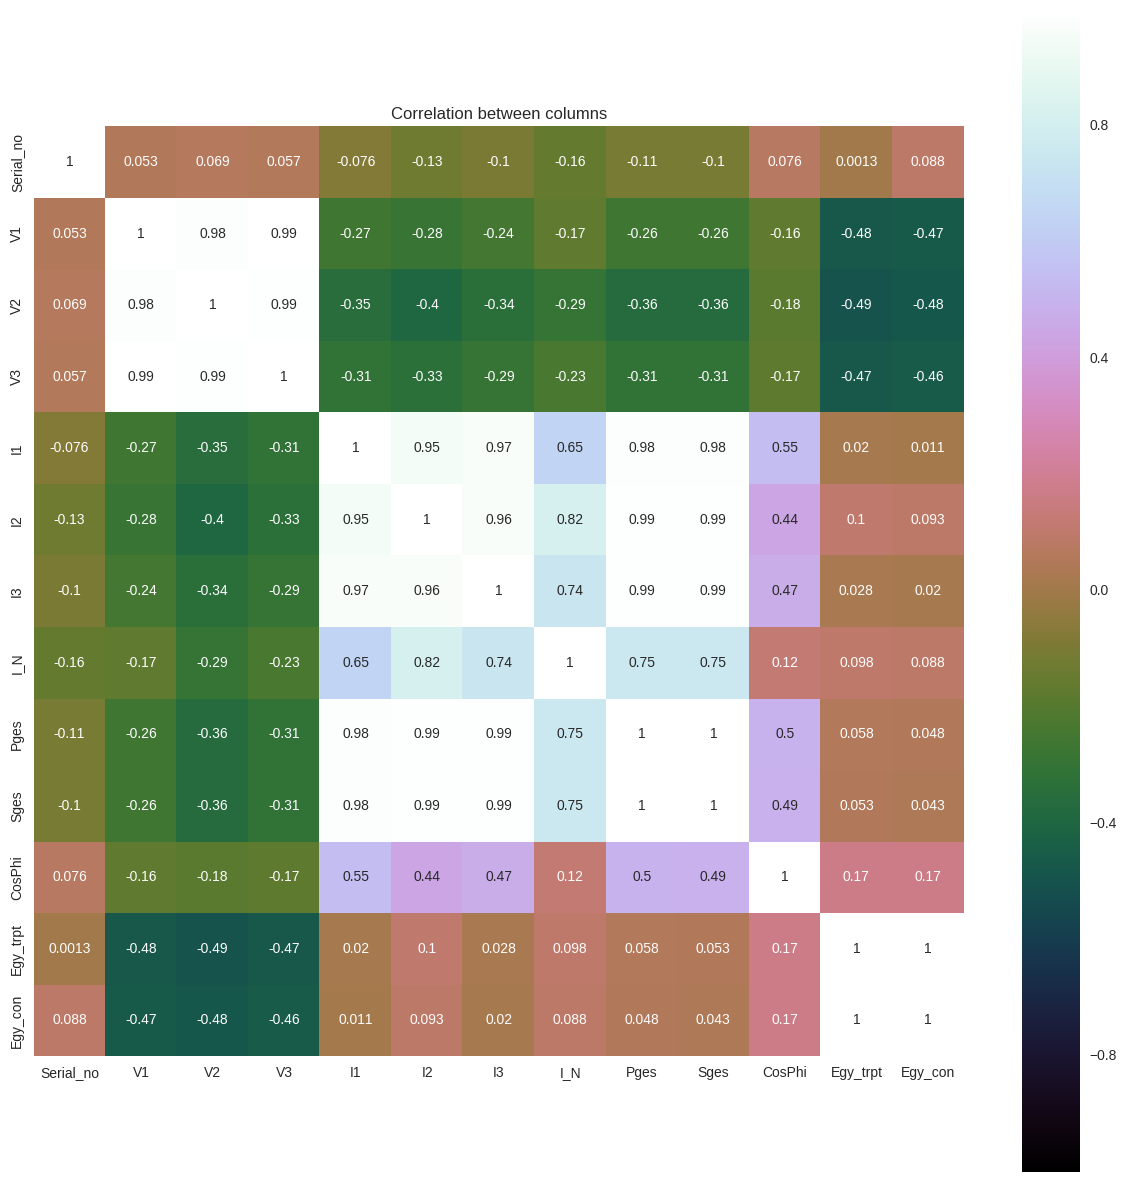

In [13]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation_part1 Torschlag_Trafo_3445388_4050187.png')

# Statistics calculation implementation

# Plot statistics by grouping location 

In [14]:
dfs_loc = dfs.groupby('Location') # groupby location wise
#df_loc_part1 = dfs_drop_part1.groupby('Location') # groupby location wise

# Describe() : Produces the basic statistics of the DataFrame

In [15]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
count,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000
mean,234.022410,233.452835,233.428127,25.639127,44.921496,39.163433,20.641423,24349.402317,25572.756219,0.902858,15374.135893,19038801.755306
std,1.673142,1.769968,1.695568,28.259383,37.125371,33.158241,11.031501,21495.431481,22575.590317,0.038948,8222.541625,7271176.889560
min,228.070000,227.180000,227.190000,1.330000,5.260000,5.360000,5.000000,3706.740000,4645.260000,0.680000,5762.000000,10023752.960000
25%,232.920000,232.240000,232.300000,6.770000,17.330000,14.420000,12.190000,8766.060000,9220.860000,0.880000,5903.000000,10899447.040000
50%,234.050000,233.490000,233.460000,9.650000,26.590000,24.080000,17.160000,13068.255000,13603.240000,0.910000,22495.000000,24281881.600000
75%,235.230000,234.750000,234.660000,41.640000,69.090000,62.500000,26.150000,39478.210000,41395.990000,0.930000,22495.000000,25506977.280000
max,238.940000,238.400000,238.320000,159.010000,200.220000,173.950000,86.440000,111751.980000,117129.390000,1.010000,22495.000000,26318983.680000


# Saving the basic statistics to csv

In [16]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe().to_csv(r'Torschlag_Trafo_3445388_4050187_describe.csv',sep=',')

In [26]:
#dfs.iloc[0:500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_1.csv',sep=',')

In [27]:
#dfs.iloc[500000:1000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_2.csv',sep=',')

In [28]:
#dfs.iloc[1000000:1500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_3.csv',sep=',')

In [29]:
#dfs.iloc[1500000:2000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_4.csv',sep=',')

In [30]:
#dfs.iloc[2000000:2500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_5.csv',sep=',')

In [31]:
#dfs.iloc[2500000:3000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_6.csv',sep=',')

In [32]:
#dfs.iloc[3000000:3500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_7.csv',sep=',')

In [33]:
#dfs.iloc[3500000:4000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_8.csv',sep=',')

In [34]:
#dfs.iloc[4000000:4500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_9.csv',sep=',')

In [35]:
#dfs.iloc[4500000:-1][:].describe().to_csv(r'Torschlag_Trafo_corr_last.csv',sep=',')

# Below you will calculate the correlation on the data grouped by location

In [17]:
#dfs_grp_loc = dfs.iloc[0:500000][:]

In [18]:
#dfs_grp_loc.groupby('Location').describe()

In [19]:
dfs_loc.corr(method='pearson', min_periods=1)

CosPhi   Egy_con  Egy_trpt  \
Location                                                               
Torschlag_Trafo_20012016.csv CosPhi     1.000000 -0.353155       NaN   
                             Egy_con   -0.353155  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.637918 -0.012462       NaN   
                             I2         0.518423  0.097574       NaN   
                             I3         0.583347  0.060479       NaN   
                             I_N        0.302860  0.291165       NaN   
                             Pges       0.586575  0.054301       NaN   
                             Serial_no -0.327583  0.979142       NaN   
                             Sges       0.577392  0.059229       NaN   
                             V1        -0.384943  0.134581       NaN   
                             V2        -0.355210 -0.000334       NaN   
                             V3        -0.371640  0.041612       NaN   
Torschlag_Trafo_20122015.csv CosPhi     1.000000 -0.221752 -0.323576   
                             Egy_con   -0.221752  1.000000  0.885959   
                             Egy_trpt  -0.323576  0.885959  1.000000   
                             I1         0.569144  0.128926  0.149993   
                             I2         0.079385  0.338433  0.172941   
                             I3        -0.321817  0.374763  0.618508   
                             I_N       -0.680079  0.362368  0.439062   
                             Pges       0.133339  0.422452  0.460079   
                             Serial_no -0.246064  0.997414  0.887247   
                             Sges       0.086153  0.440265  0.485317   
                             V1         0.197488  0.476021  0.182406   
                             V2         0.221856  0.413647  0.121712   
                             V3         0.242910  0.413618  0.119918   
Torschlag_Trafo_21012016.csv CosPhi     1.000000  0.080197       NaN   
                             Egy_con    0.080197  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.628602  0.026793       NaN   
...                                          ...       ...       ...   
Torschlag_Trafo_22012016.csv Sges       0.489902  0.042694       NaN   
                             V1         0.111835  0.351018       NaN   
                             V2         0.081666  0.354893       NaN   
                             V3         0.080716  0.326341       NaN   
Torschlag_Trafo_22122015.csv CosPhi     1.000000 -0.018777       NaN   
                             Egy_con   -0.018777  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.676308 -0.013668       NaN   
                             I2         0.640486  0.071024       NaN   
                             I3         0.646972  0.060606       NaN   
                             I_N        0.303577  0.241376       NaN   
                             Pges       0.672523  0.051045       NaN   
                             Serial_no -0.031270  0.978733       NaN   
                             Sges       0.658678  0.045830       NaN   
                             V1        -0.230540  0.406923       NaN   
                             V2        -0.280321  0.338939       NaN   
                             V3        -0.253581  0.372972       NaN   
Torschlag_Trafo_23012016.csv CosPhi     1.000000 -0.014787       NaN   
                             Egy_con   -0.014787  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.395622  0.355724       NaN   
                             I2        -0.172714  0.477605       NaN   
                             I3         0.094259  0.627302       NaN   
          

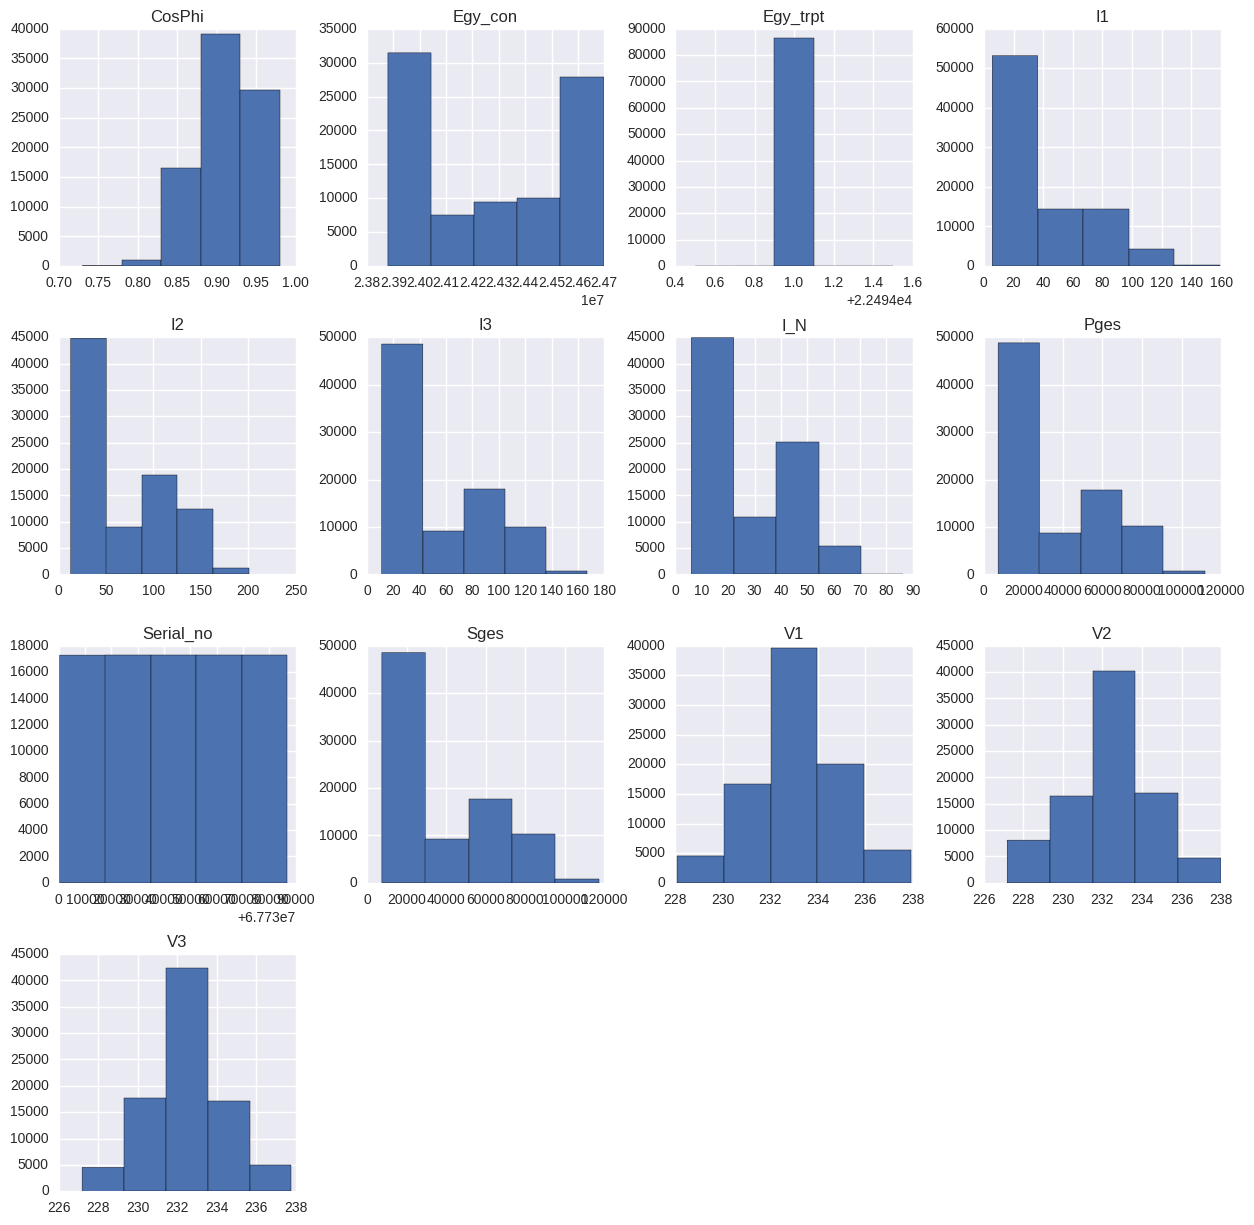

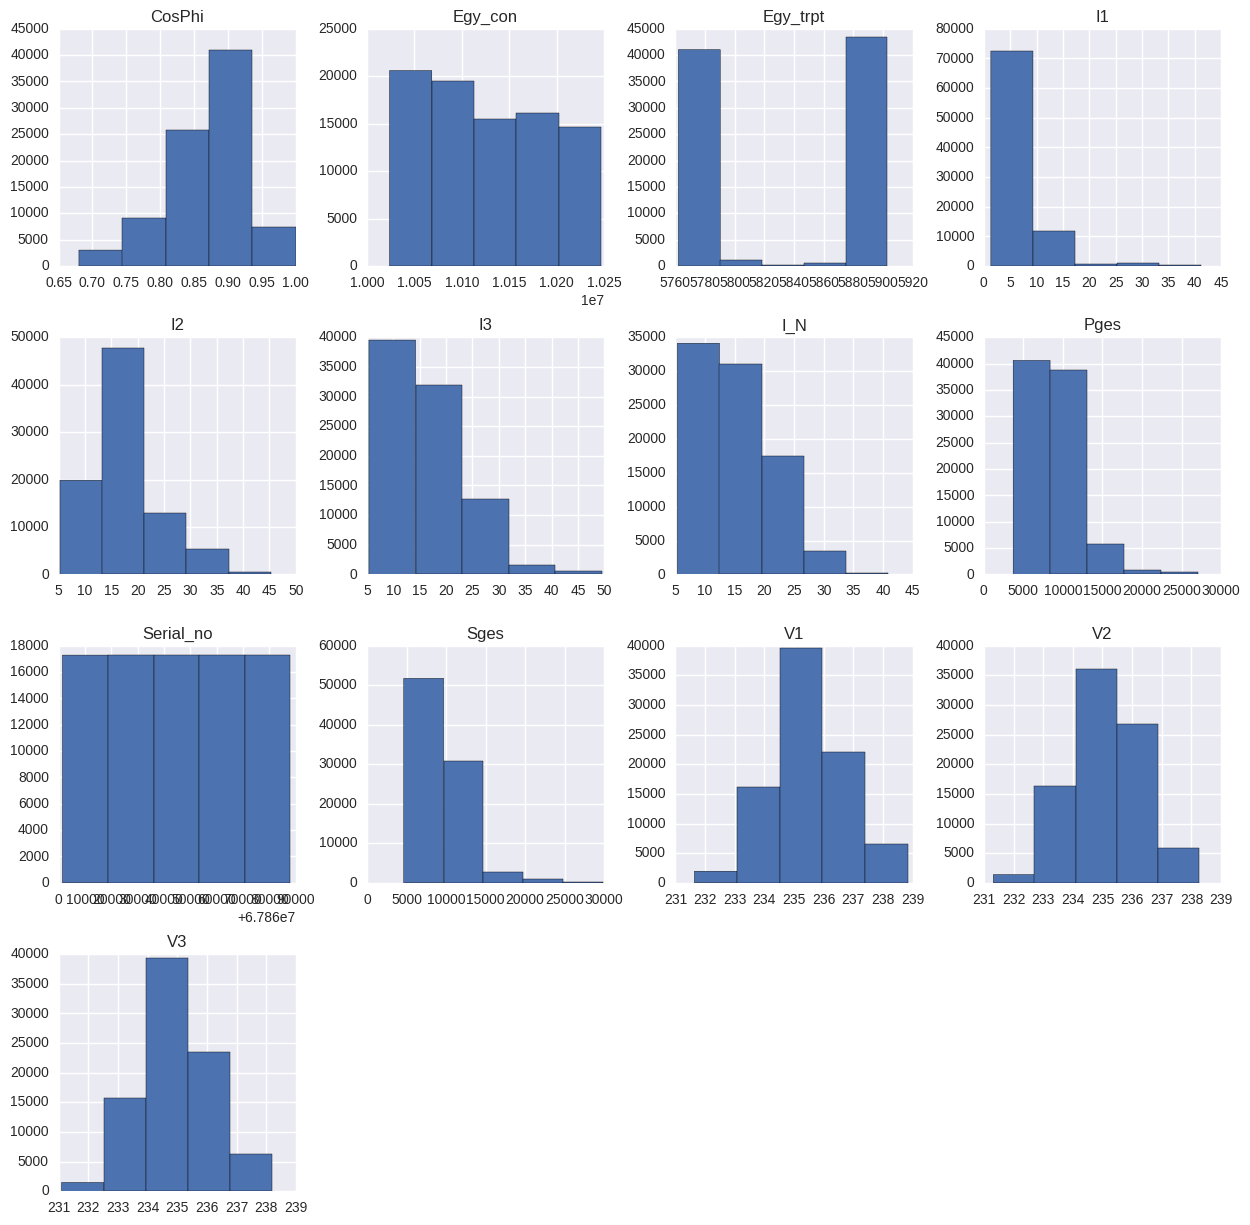

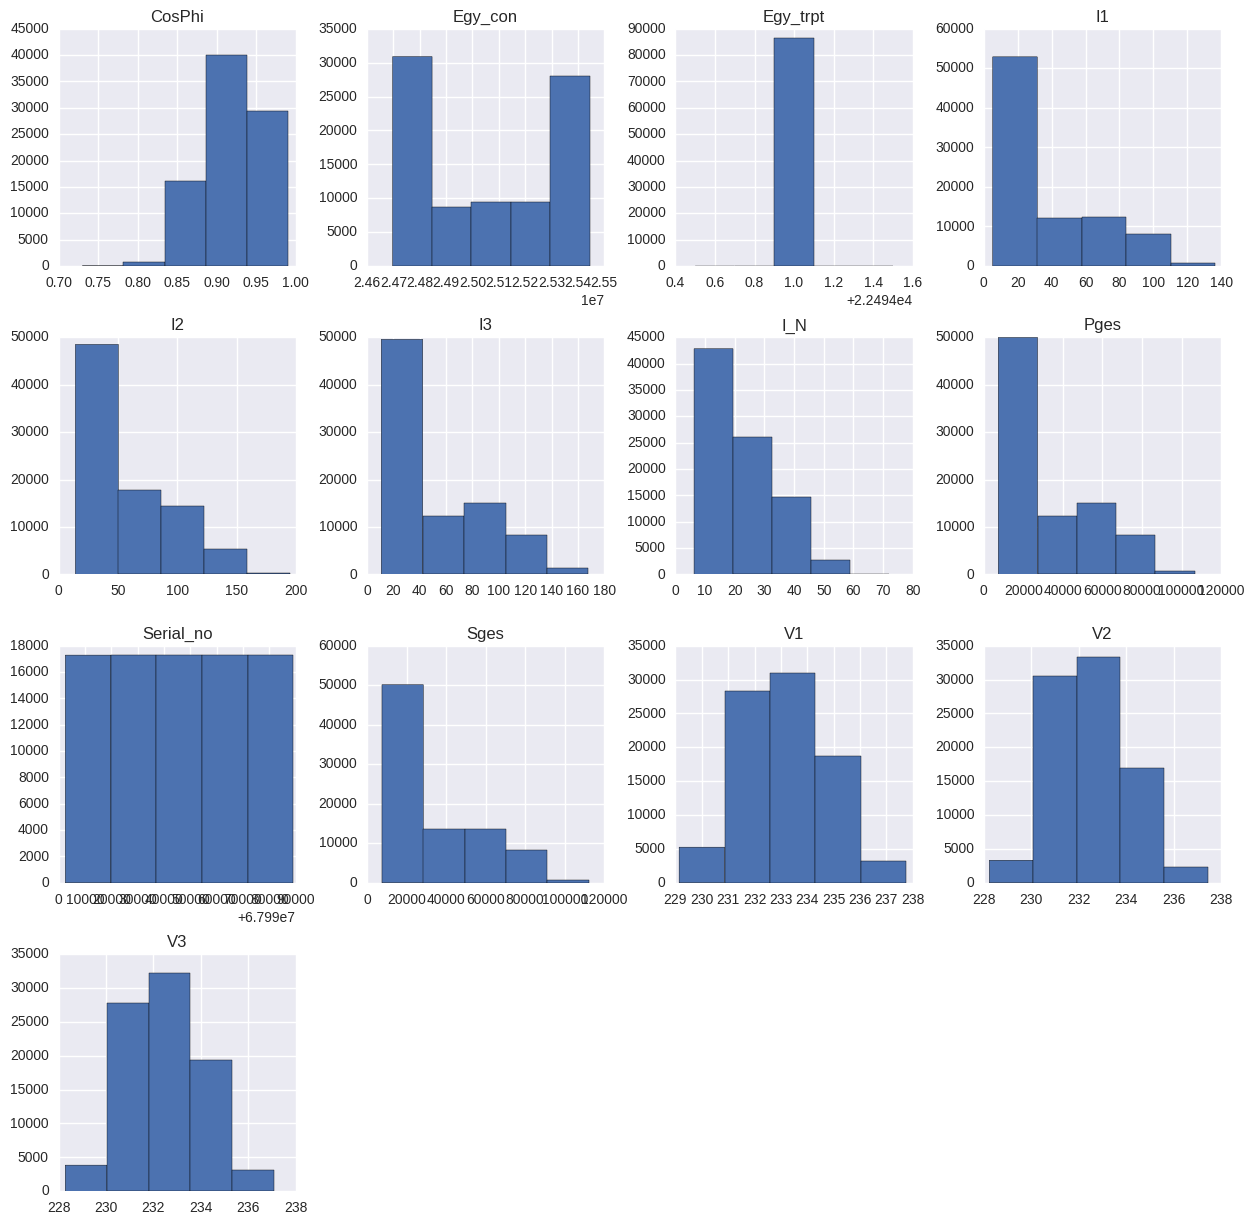

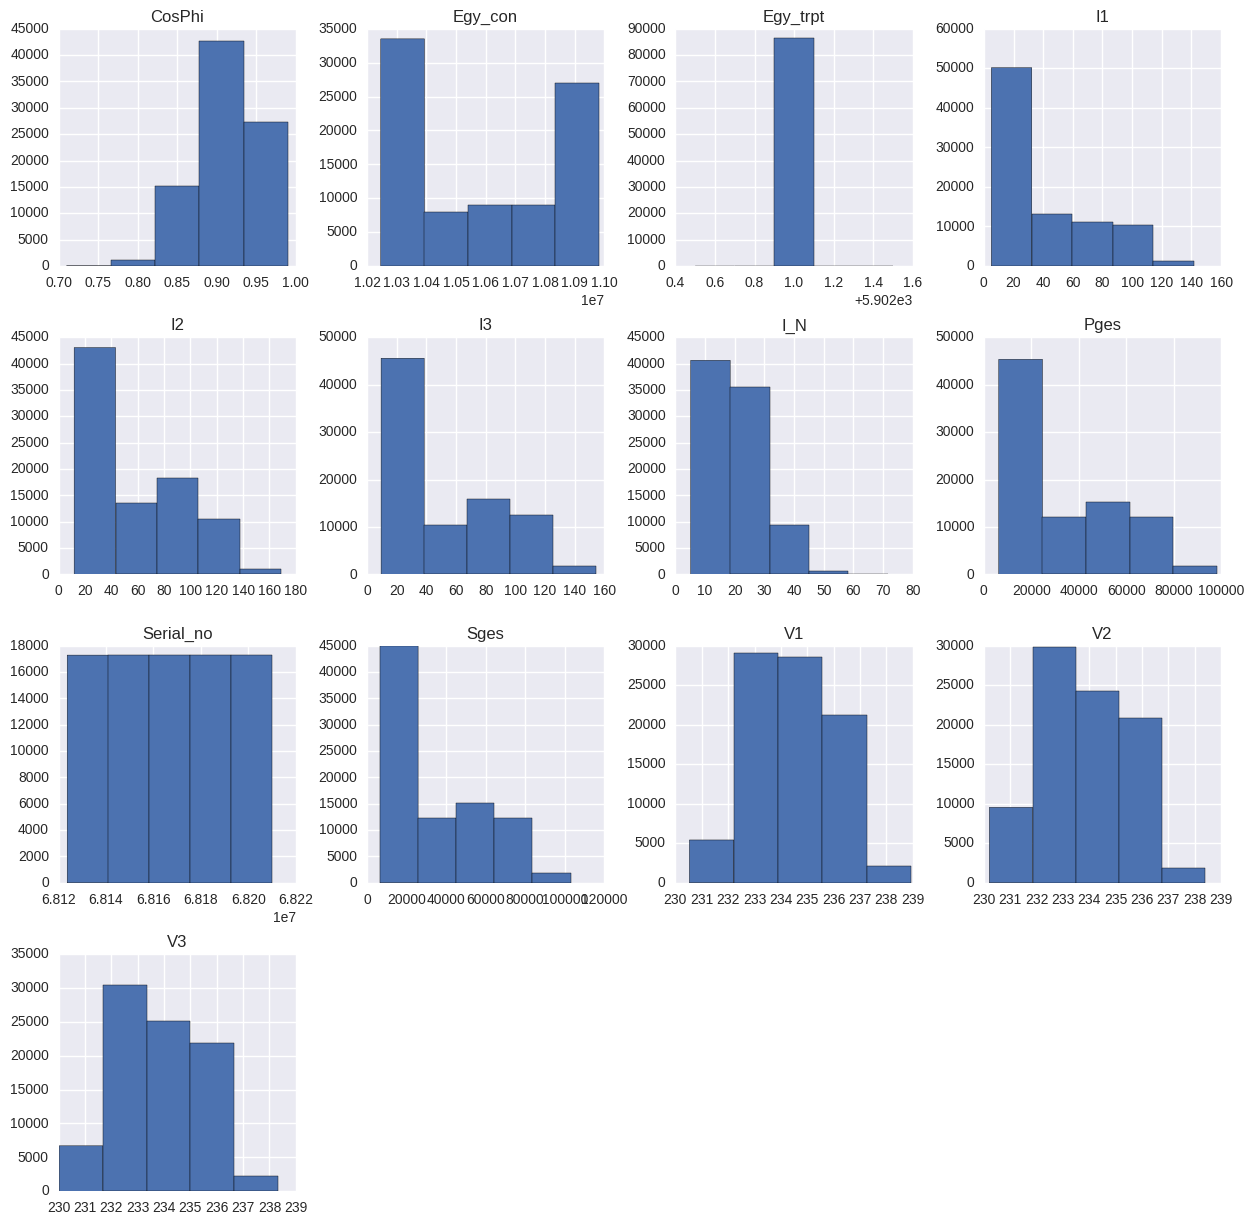

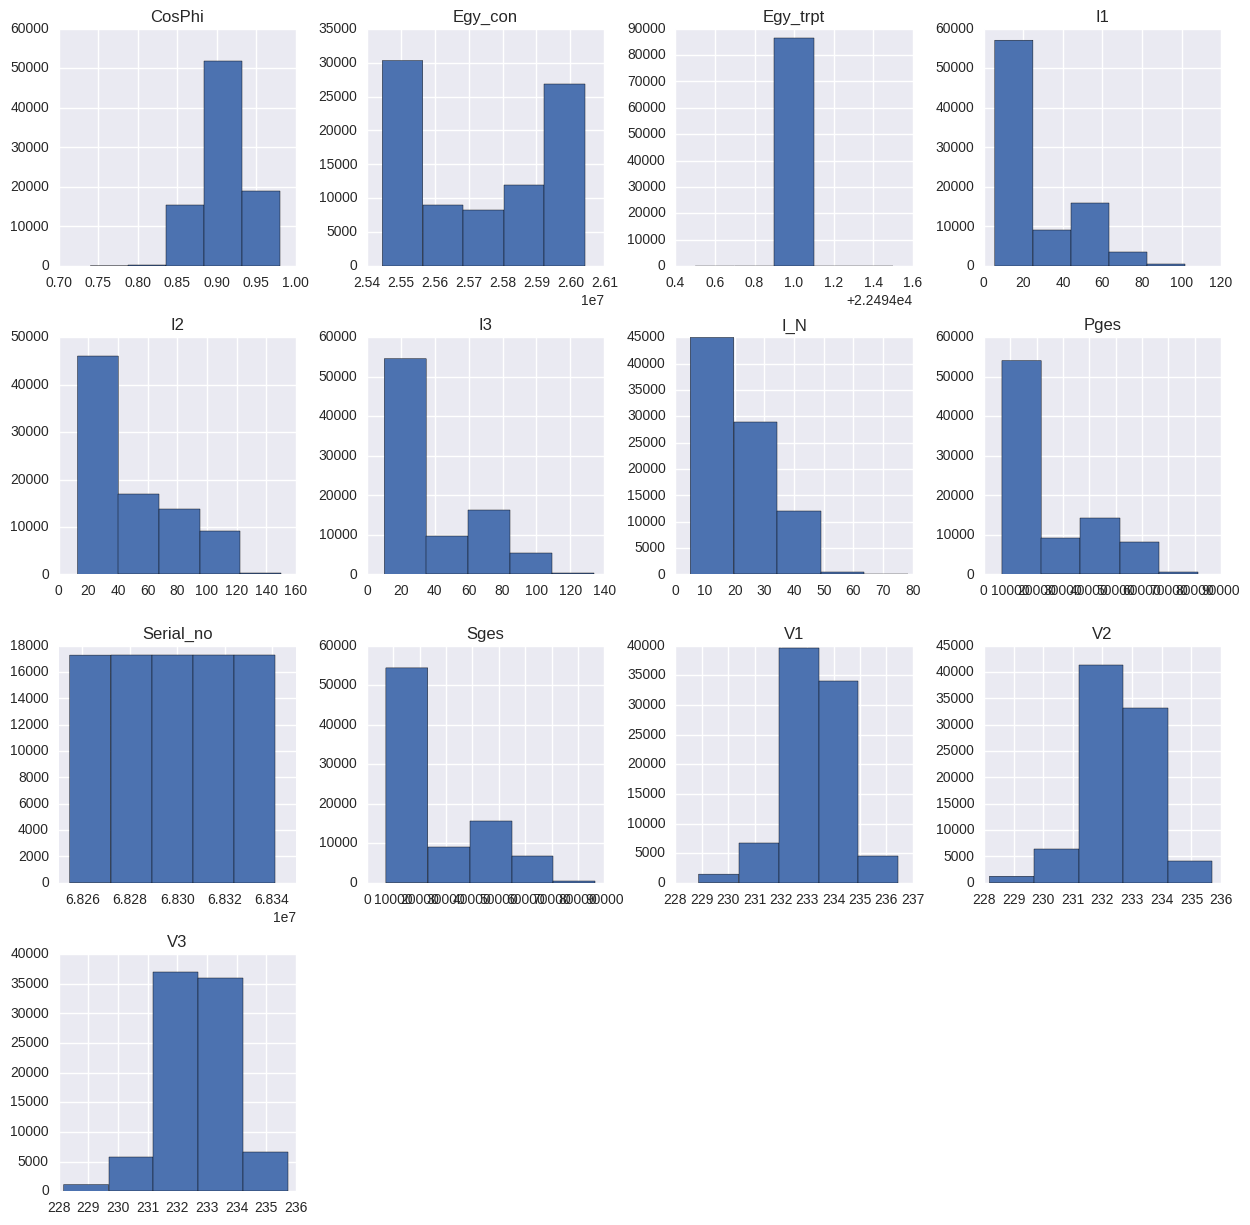

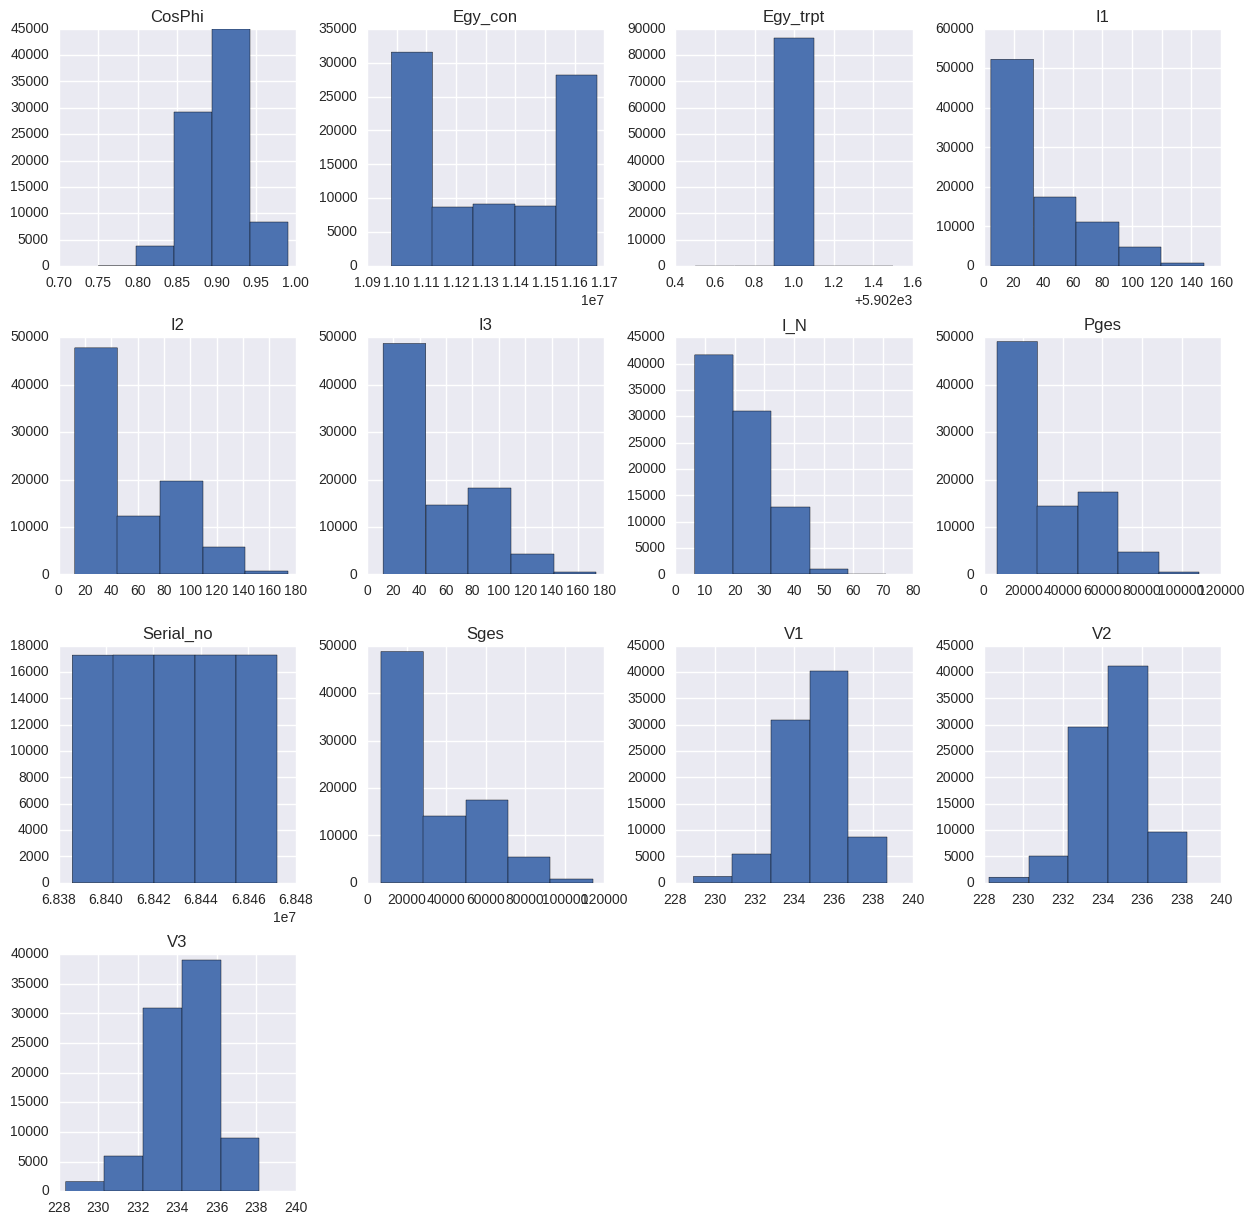

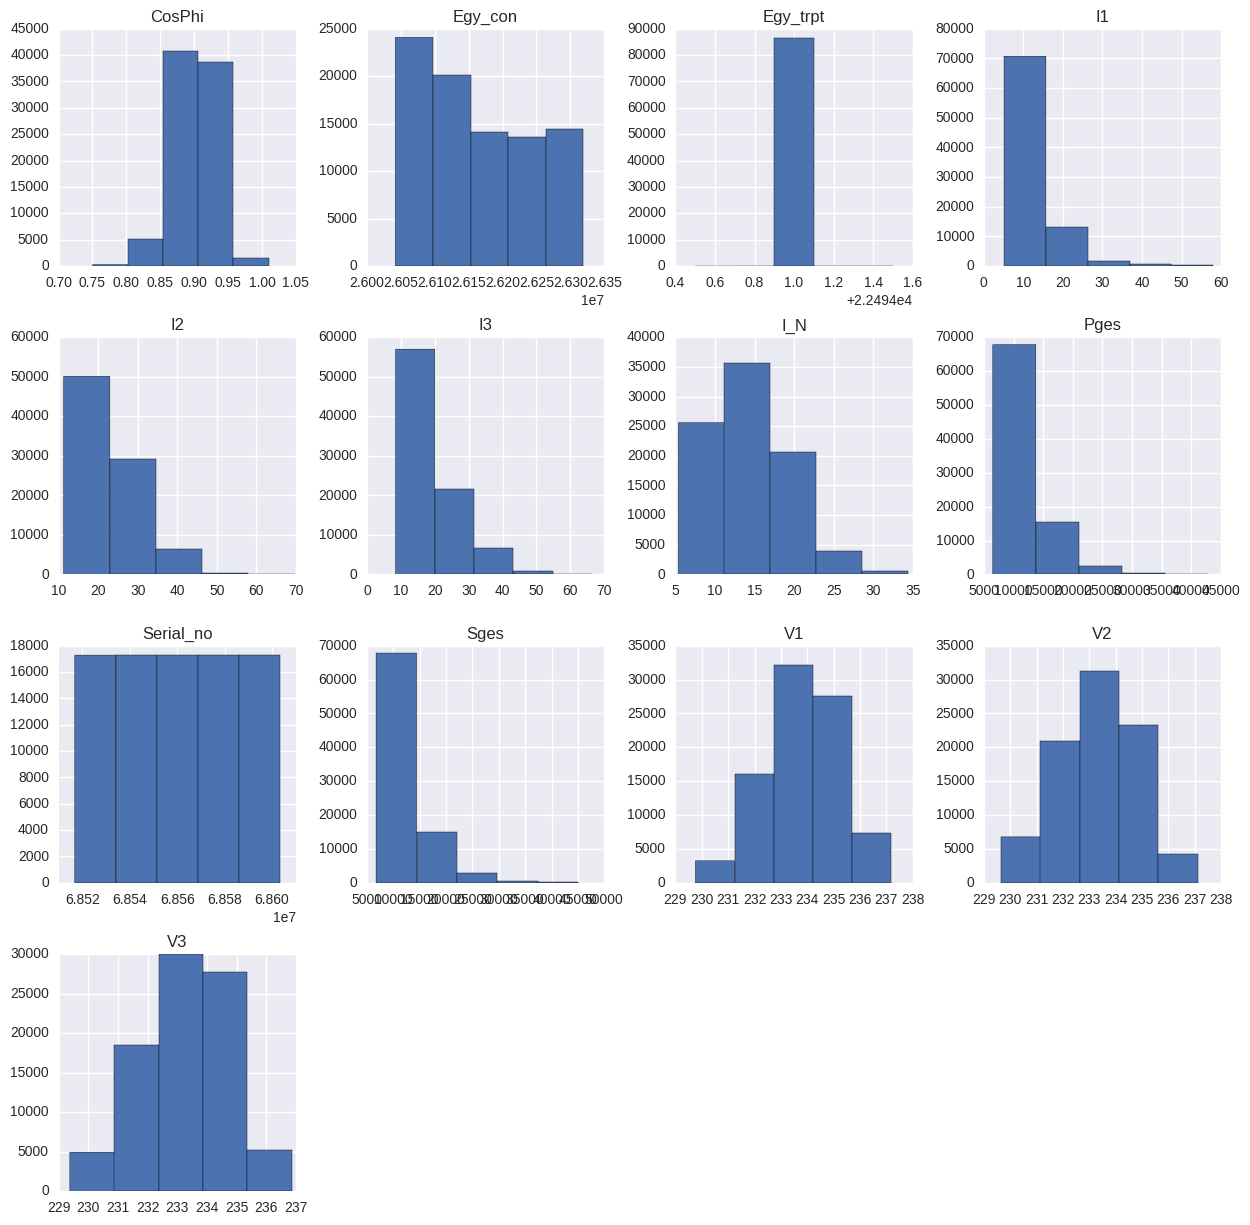

In [20]:
dfs_loc.hist(bins=5,figsize=(15,15))
plt.savefig('Torschlag_Trafo_groupby_location_pearson_corr_3445388_4050187.png')
    

# Compute only the mean of the data grouped by location and visualize

In [21]:
df_st_mean = dfs_loc.mean()
df_st_mean

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,,
Torschlag_Trafo_20012016.csv,67773610,233.097761,232.392966,232.502372,35.309886,66.496630,52.523658,28.171191,34078.736755,35736.875561,0.904735,22495.00000,24275710.425809
Torschlag_Trafo_20122015.csv,67904680,235.467689,235.065108,234.919473,7.124950,17.443828,16.963842,15.359506,9274.395366,9761.847300,0.871287,5832.95125,10127207.377244
Torschlag_Trafo_21012016.csv,68035750,233.170221,232.502217,232.477251,33.631954,55.760594,49.979533,22.277816,31167.054663,32481.897282,0.917016,22495.00000,25060176.615201
Torschlag_Trafo_21122015.csv,68166820,234.415480,233.864183,233.812081,35.463785,53.769257,49.424595,20.601987,30654.701471,32327.736784,0.910336,5903.00000,10590412.602963
Torschlag_Trafo_22012016.csv,68297890,233.289696,232.551297,232.713704,24.656220,47.910669,38.985802,21.432976,24865.307538,25978.315385,0.911548,22495.00000,25736904.640475
Torschlag_Trafo_22122015.csv,68428960,234.944451,234.447584,234.312664,32.486883,50.174091,47.940909,22.257956,28852.893682,30587.482875,0.904609,5903.00000,11317641.821778
Torschlag_Trafo_23012016.csv,68560030,233.771573,233.346485,233.259343,10.800211,22.895404,18.325695,14.388529,11552.726745,12135.138349,0.900473,22495.00000,26163558.803675


In [22]:
df_st_mean.to_csv(r'Torschlag_trafo_mean_groupby_location_3445388_4050187.csv',sep=',')

# Plot the groupby location 

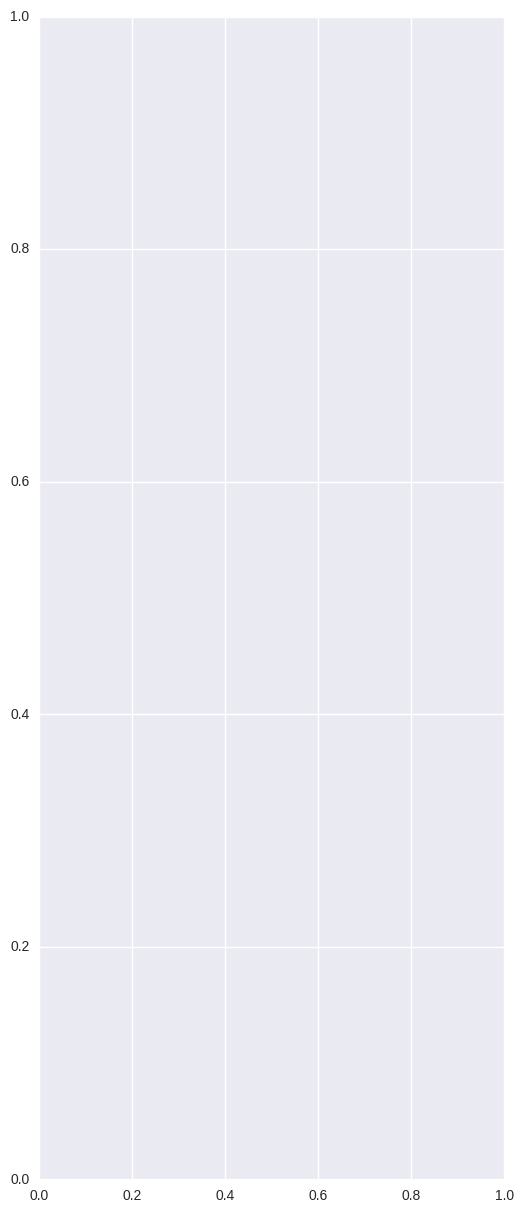

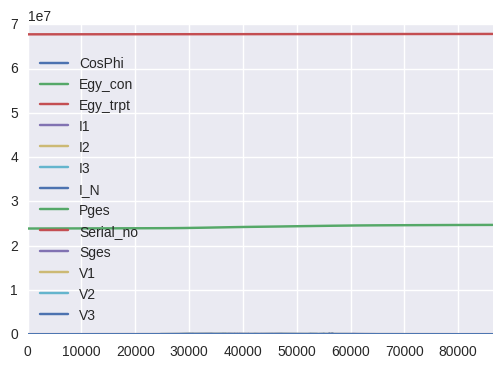

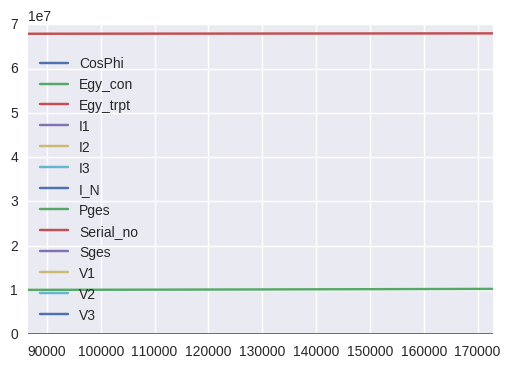

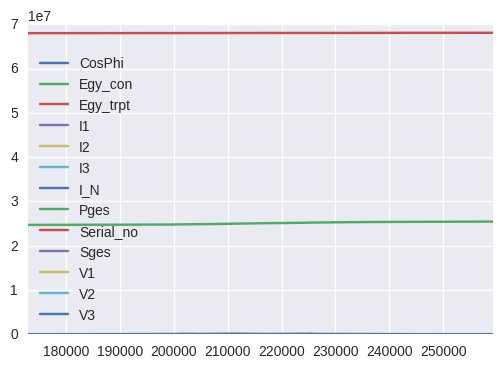

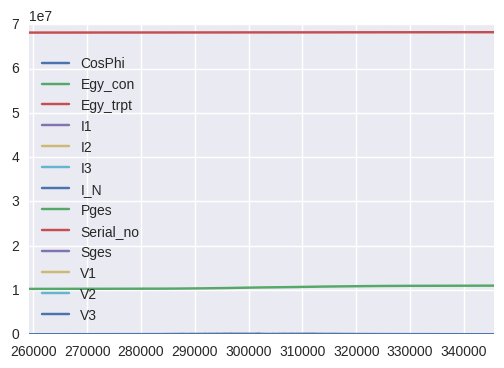

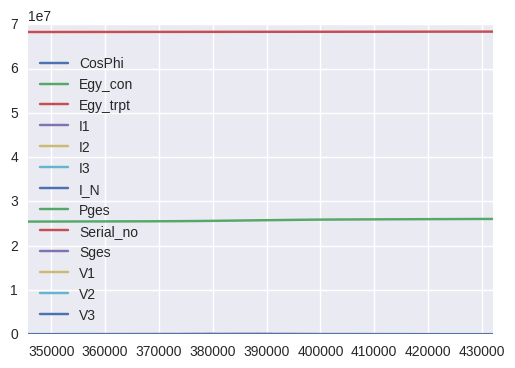

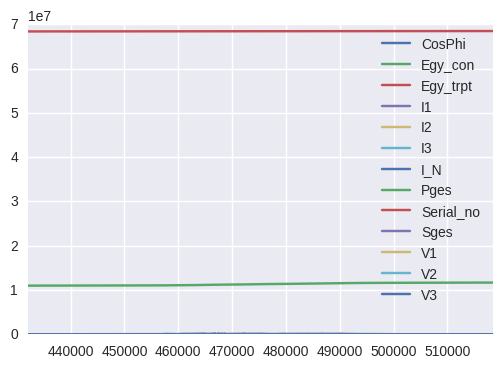

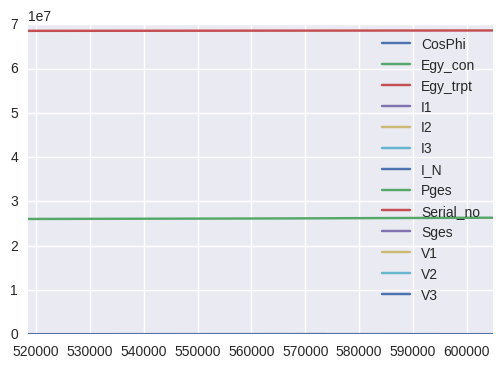

In [23]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = dfs_loc.plot(kind='kde', ax2 = ax2, legend=False)


# PCA implementation

In [24]:
dfs_drop = dfs.drop(labels=['Serial_no', 'Date', 'Time','Location'],axis=1)

In [25]:
dfs_drop.columns

Index([u'V1', u'V2', u'V3', u'I1', u'I2', u'I3', u'I_N', u'Pges', u'Sges',
       u'CosPhi', u'Egy_trpt', u'Egy_con'],
      dtype='object')

In [26]:
X = dfs_drop.iloc[:,0:6].values
X

array([[ 237.06,  236.96,  236.71,    6.99,   14.88,   14.09],
       [ 237.06,  236.96,  236.71,    6.99,   14.88,   14.09],
       [ 237.06,  236.96,  236.71,    6.99,   14.88,   14.09],
       ..., 
       [ 231.56,  230.78,  230.8 ,    7.26,   27.01,   10.5 ],
       [ 231.56,  230.78,  230.8 ,    7.26,   27.01,   10.5 ],
       [ 231.49,  231.18,  231.2 ,    7.31,   27.36,   10.46]])

In [27]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [28]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [29]:
Y_sklearn.shape

(604800, 6)

In [30]:
n_components = pd.DataFrame(Y_sklearn, columns=('V1', 'V2', 'V3', 'I1', 'I2', 'I3'))
n_components.head()

,V1,V2,V3,I1,I2,I3
0,-3.271483,1.381107,0.085924,-0.072510,0.088123,-0.019187
1,-3.271483,1.381107,0.085924,-0.072510,0.088123,-0.019187
2,-3.271483,1.381107,0.085924,-0.072510,0.088123,-0.019187
3,-3.352489,1.460041,0.102365,-0.060163,0.069633,-0.098026
4,-3.414196,1.518822,0.086062,-0.084250,0.127205,0.003553


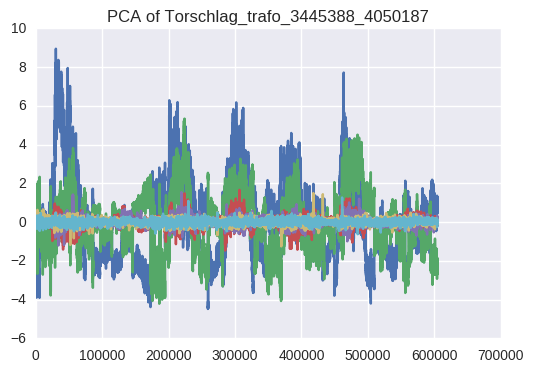

In [31]:
fig = plt.figure() 
plt.legend(loc='upper right')
plt.plot(n_components)
plt.title("PCA of Torschlag_trafo_3445388_4050187")

fig.savefig('PCA of Torschlag_Trafo_3445388_4050187.png')


# Plot voltage vs time

# Plot V1 and I1 vs Time of all locations extracted from SQL.

In [32]:
#dfs.iloc[500000:1000000][:].groupby('Location').describe()
dfs['Location'].unique()

array(['Torschlag_Trafo_20012016.csv', 'Torschlag_Trafo_20122015.csv',
       'Torschlag_Trafo_21012016.csv', 'Torschlag_Trafo_21122015.csv',
       'Torschlag_Trafo_22012016.csv', 'Torschlag_Trafo_22122015.csv',
       'Torschlag_Trafo_23012016.csv'], dtype=object)

In [33]:
def plotfunc(ax, a, b):
    return ax.plot(a, b)

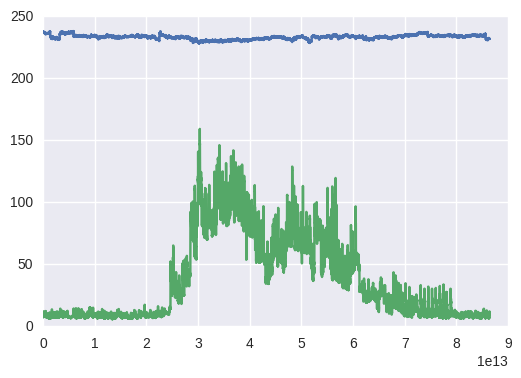

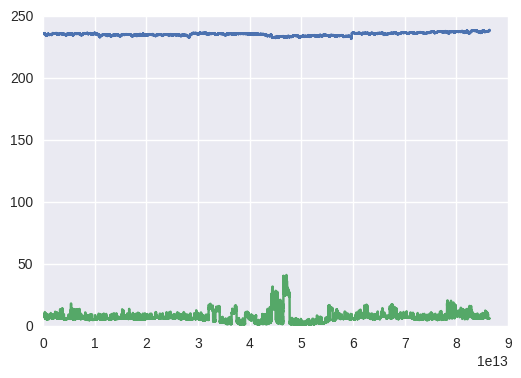

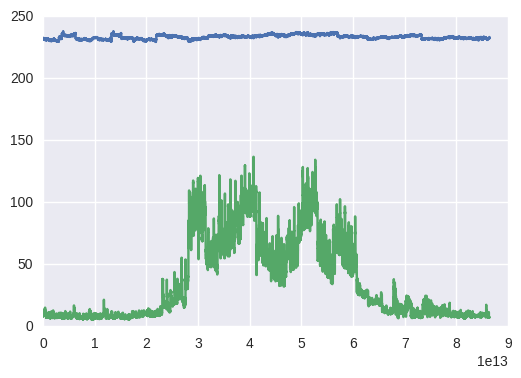

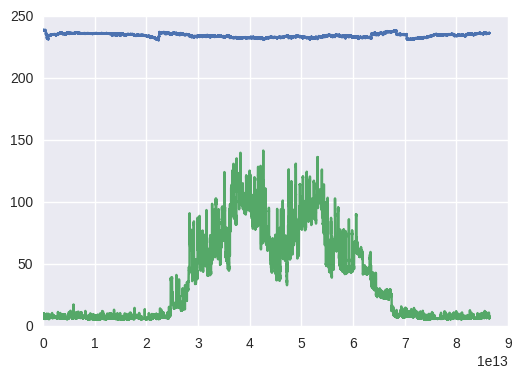

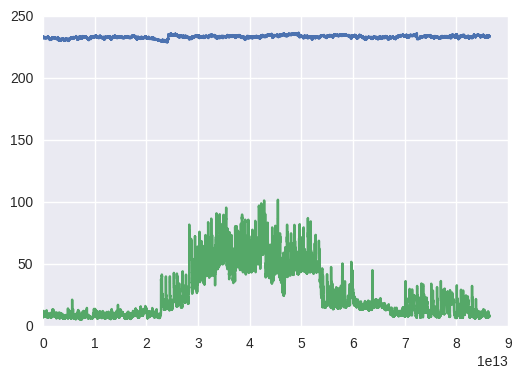

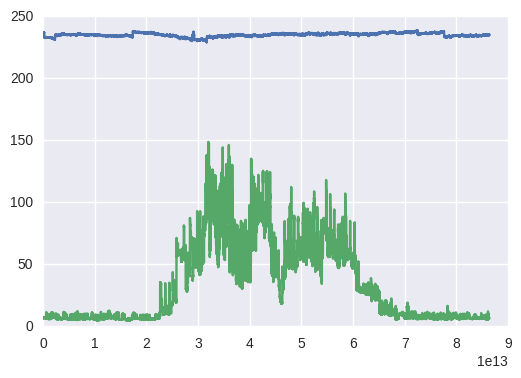

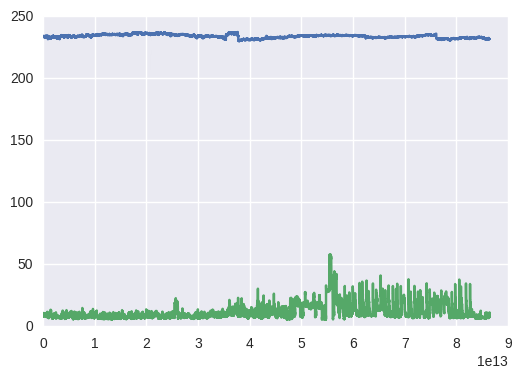

In [34]:
for loc in iter(dfs['Location'].unique()):
    fig, ax = plt.subplots(1,1)
    b = dfs['V1'].where (dfs['Location'] == loc)
    b1 = dfs['I1'].where (dfs['Location'] == loc)
    a = dfs['Time'].where (dfs['Location'] == loc)
    l1 = plotfunc(ax, a, b)
    l2 = plotfunc(ax, a, b1)
    plt.savefig('V1_I1_Time of %s.png' % loc)
    plt.show()